In [ ]:
# work with pytorch3d-env1-for-analysis
# conda activate pytorch3d-env1-for-analysis

In [1]:
print("yoyoydfdfo")

yoyoydfdfo


### for 3d metric

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
file_path = 'tables/scenario3.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Function to create and save a plot similar to the old style
def create_modified_plot(metric, data, models, plt_size, pfontsize, output_directory, colors):
    f = plt.figure(figsize=plt_size)
    ax = plt.subplot(111)

    for i, model in enumerate(models):
        model_data = data[data['Model Name'] == model]
        color = colors[i % len(colors)]  # Cycle through colors if more models than colors
        ax.plot(
            model_data['Number of Iterations'],
            model_data[metric],
            label=model,
            color=color,
            linewidth=1.5
        )

    ax.grid(True)
    # plt.title(f"{metric} for Each Model", fontsize=10)
    # plt.xlabel('Number of Iterations', fontsize=pfontsize)
    # plt.ylabel(f'{metric}', fontsize=pfontsize)
    # ax.legend(loc="upper left", fontsize=pfontsize, handlelength=1)

    f.tight_layout()

    # Save the plot
    output_path = os.path.join(output_directory, f"{os.path.basename(file_path).split('.')[0]}_{metric}.pdf")
    f.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.close(f)

# Identify unique models in the dataset
models = data['Model Name'].unique()

# Plotting each metric with the modified style
metrics = ['Precision', 'Recall', 'F1 Score']
plt_size = [5 / 1.75, 3.5 / 1.75]  # Size as per old code
pfontsize = 9  # Font size as per old code
output_directory = 'analysis/iterations_and_F1'  # Replace with your output directory

# Define colors for the plots
colors = ['red', 'blue', 'green']  # Replace or extend these colors as needed

for metric in metrics:
    create_modified_plot(metric, data, models, plt_size, pfontsize, output_directory, colors)


### for 2d metric

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
file_path = 'tables/scenario3.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Function to create and save a plot similar to the old style
def create_modified_plot(metric, data, models, plt_size, pfontsize, output_directory, colors):
    f = plt.figure(figsize=plt_size)
    ax = plt.subplot(111)

    for i, model in enumerate(models):
        model_data = data[data['Model Name'] == model]
        color = colors[i % len(colors)]  # Cycle through colors if more models than colors
        ax.plot(
            model_data['Number of Iterations'],
            model_data[metric],
            label=model,
            color=color,
            linewidth=1.5
        )

    ax.grid(True)
    # plt.title(f"{metric} for Each Model", fontsize=10)
    # plt.xlabel('Number of Iterations', fontsize=pfontsize)
    # plt.ylabel(f'{metric}', fontsize=pfontsize)
    # ax.legend(loc="upper left", fontsize=pfontsize, handlelength=1)

    f.tight_layout()

    # Save the plot
    output_path = os.path.join(output_directory, f"{os.path.basename(file_path).split('.')[0]}_{metric}.pdf")
    f.savefig(output_path, format="pdf", bbox_inches="tight")
    plt.close(f)

# Identify unique models in the dataset
models = data['Model Name'].unique()

# Plotting each metric with the modified style
metrics = ['PSNR', 'SSIM', 'LPIPS']
plt_size = [5 / 1.75, 3.5 / 1.75]  # Size as per old code
pfontsize = 9  # Font size as per old code
output_directory = 'analysis/iterations_and_2d'  # Replace with your output directory

# Define colors for the plots
colors = ['red', 'blue', 'green']  # Replace or extend these colors as needed

for metric in metrics:
    create_modified_plot(metric, data, models, plt_size, pfontsize, output_directory, colors)


# For Early Stopping

## example run

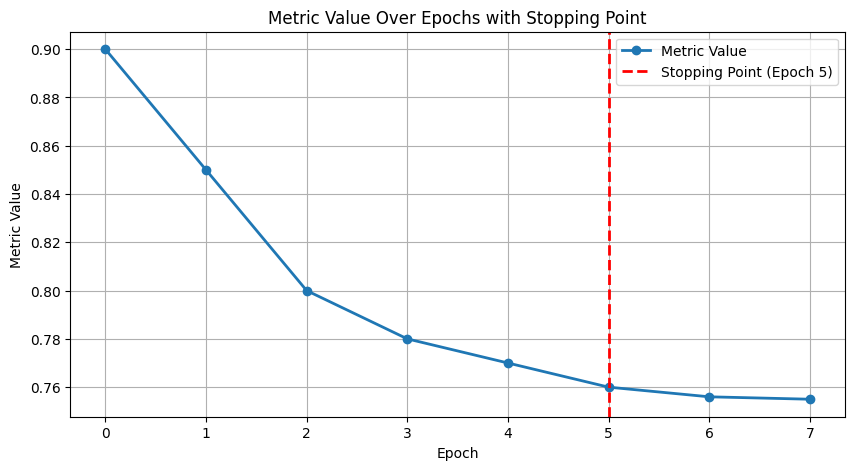

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def hyperparameter_free_stopping_point(metric_values, window_size=5):
    """
    Determines the stopping point in a list of metric values using a hyperparameter-free approach.
    It calculates the relative changes and uses the moving standard deviation to identify a plateau.

    :param metric_values: List of metric values (assumed to be a loss that should decrease).
    :param window_size: The number of values to consider for the moving standard deviation.
    :return: The index to stop training at.
    """
    # Avoid division by zero and ensure we have enough points to calculate statistics
    if len(metric_values) < window_size + 1:
        return 0

    # Calculate the relative changes (as a percentage of the previous value)
    relative_changes = np.array([(metric_values[i] - metric_values[i - 1]) / metric_values[i - 1]
                                 for i in range(1, len(metric_values))])

    # Compute the moving standard deviation of the relative changes
    moving_std_dev = [np.std(relative_changes[max(0, i - window_size):i]) for i in range(window_size, len(relative_changes))]

    # Pad the standard deviation list to match the length of relative changes
    moving_std_dev = [moving_std_dev[0]] * window_size + moving_std_dev

    # Identify the point where the relative change falls within one standard deviation of the moving average
    for i in range(window_size, len(relative_changes)):
        if abs(relative_changes[i]) < moving_std_dev[i]:
            # Check if the following changes also fall within this bound, indicating a plateau
            if all(abs(relative_changes[j]) < moving_std_dev[j] for j in range(i, len(relative_changes))):
                return i
    return len(metric_values) - 1  # If no plateau is found, return the last index

# Example list of metric values
# metric_values_example = [0.9, 0.85, 0.8, 0.78, 0.77, 0.76, 0.756, 0.755]
metric_values_example=[1.0352810469193532, 1.01420561908607, 0.9991665964168086, 0.9977990625346914, 0.996534833272387, 0.9577772785545935, 0.9294340342392066, 0.9255442844054746, 0.9168405721800759, 0.91637523534489, 0.9163029699029044, 0.900840055096687, 0.8927717749111032, 0.8697804391053667, 0.8666162753407032, 0.8660201217977658, 0.8536122620576895, 0.8225878846452629, 0.8224274469695819, 0.8004971332960786, 0.7987866576230929, 0.7927989280588228, 0.7890405341935574, 0.7504628220408508, 0.7449412985728835, 0.7448585710302572, 0.7356090478970494, 0.733468808051067, 0.7207461189178507, 0.7158106456916982, 0.6969764995343466, 0.6912367197797985, 0.6572588748390442, 0.6557136728024998, 0.646496576567525, 0.6461029815032729, 0.6459841222392225, 0.6236493767579704, 0.6044983616110247, 0.6002399977005543, 0.595994761315024, 0.5708656753925357, 0.5532322943176451, 0.5408273645282323, 0.5373031676160711, 0.5359579703819444, 0.5320548404983886, 0.5055563376969607, 0.4957451943957206, 0.47792612468149404]

# Apply the hyperparameter-free stopping point function to the example metric values
free_stopping_index = hyperparameter_free_stopping_point(metric_values_example)

# Plotting the metric values and the hyperparameter-free identified stopping point
plt.figure(figsize=(10, 5))
plt.plot(metric_values_example, label='Metric Value', marker='o', linestyle='-', linewidth=2)

# Highlight the hyperparameter-free identified stopping point
plt.axvline(x=free_stopping_index, color='r', linestyle='--', linewidth=2, label='Stopping Point (Epoch {})'.format(free_stopping_index))

# Annotate the hyperparameter-free identified stopping point
plt.annotate('Stopping Point', xy=(free_stopping_index, metric_values_example[free_stopping_index]),
             xytext=(free_stopping_index+1, metric_values_example[free_stopping_index] + max(metric_values_example)*0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.title('Metric Value Over Epochs with Stopping Point', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## running on uninterpolated Values

[0.75, 0.65, 0.55, 0.45, 0.44, 0.19, 0.15, 0.13, 0.12]


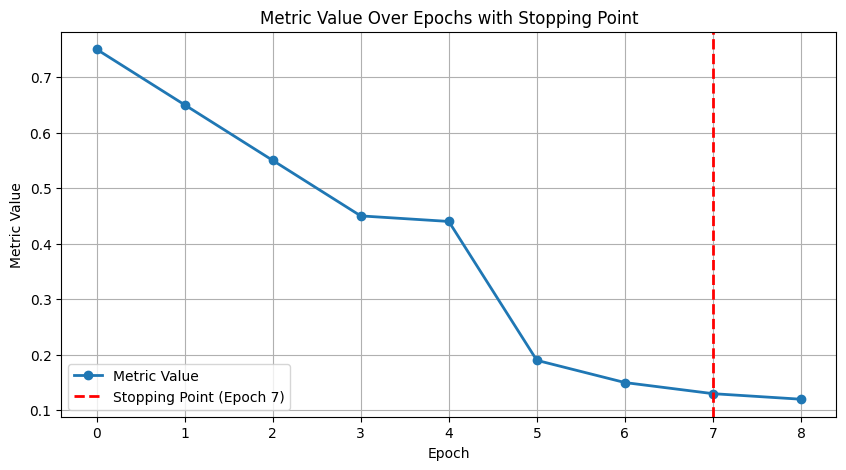

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hyperparameter_free_stopping_point(metric_values, window_size=5, consistency_length=3, std_dev_factor=1.5):
    if len(metric_values) < max(window_size + 1, consistency_length):
        return 0

    relative_changes = np.array([(metric_values[i] - metric_values[i - 1]) / metric_values[i - 1]
                                 for i in range(1, len(metric_values))])

    moving_avg = [np.mean(relative_changes[max(0, i - window_size):i]) for i in range(1, len(relative_changes) + 1)]
    moving_std_dev = [np.std(relative_changes[max(0, i - window_size):i]) for i in range(1, len(relative_changes) + 1)]

    # Check for plateau
    # Check for plateau
    for i in range(window_size, len(relative_changes)):
        if abs(relative_changes[i] - moving_avg[i]) < std_dev_factor * moving_std_dev[i]:
            # Check if the pattern continues for a set number of past iterations
            if all(abs(relative_changes[j] - moving_avg[j]) < std_dev_factor * moving_std_dev[j] 
                for j in range(max(i - consistency_length + 1, 0), i + 1)):
                return i
    return len(metric_values) - 1

# Example usage with your metric values
# metric_values_example = [0.9, 0.85, 0.8, 0.78, 0.77, 0.76, 0.756, 0.755]
# metric_values_example = [
#     0.9, 0.85, 0.8, 0.76, 0.72, 
#     0.69, 0.66, 0.64, 0.62, 0.61, 
#     0.605, 0.6, 0.595, 0.59, 0.586, 
#     0.583, 0.581, 0.579, 0.578, 0.577
# ]
file_path = 'tables/scenario1.csv'  # Replace with your file path
data = pd.read_csv(file_path)
model_data = data[data['Model Name'] == "NeRFacto"]
metric_values_example=list(model_data["LPIPS"])
print(metric_values_example)




free_stopping_index = hyperparameter_free_stopping_point(metric_values_example)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(metric_values_example, label='Metric Value', marker='o', linestyle='-', linewidth=2)
plt.axvline(x=free_stopping_index, color='r', linestyle='--', linewidth=2, label='Stopping Point (Epoch {})'.format(free_stopping_index))
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Metric Value Over Epochs with Stopping Point')
plt.legend()
plt.grid(True)
plt.show()

## linearly interpolating the data


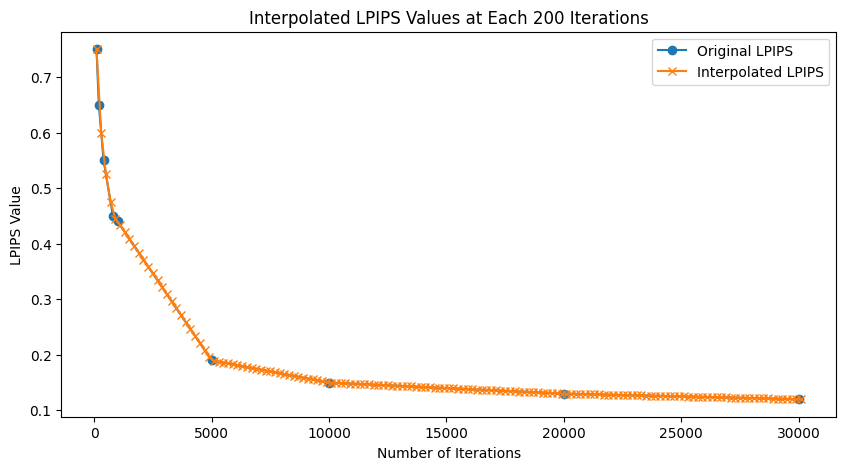

In [3]:
import pandas as pd

file_path = 'tables/scenario1.csv'
data = pd.read_csv(file_path)
model_data = data[data['Model Name'] == "NeRFacto"]

sorted_model_data = model_data.sort_values('Number of Iterations').drop_duplicates('Number of Iterations')

iterations = sorted_model_data['Number of Iterations'].values
lpips_values = sorted_model_data['LPIPS'].values

from scipy.interpolate import interp1d
import numpy as np

granularity = 200  # or any other value you prefer
interp_func = interp1d(iterations, lpips_values, kind='linear', fill_value="extrapolate")
new_iterations = np.arange(min(iterations), max(iterations) + granularity, granularity)
interpolated_values = interp_func(new_iterations)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(iterations, lpips_values, label='Original LPIPS', marker='o')
plt.plot(new_iterations, interpolated_values, label='Interpolated LPIPS', marker='x')
plt.xlabel('Number of Iterations')
plt.ylabel('LPIPS Value')
plt.title('Interpolated LPIPS Values at Each 200 Iterations')
plt.legend()
plt.show()



## running on interpolated Values

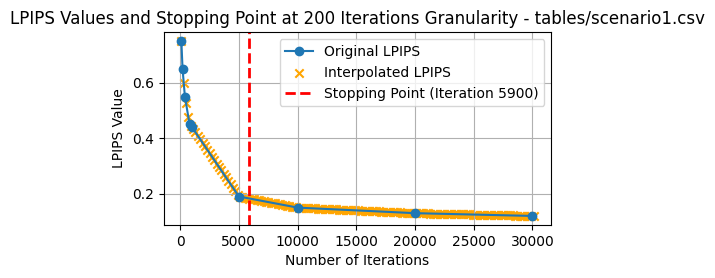

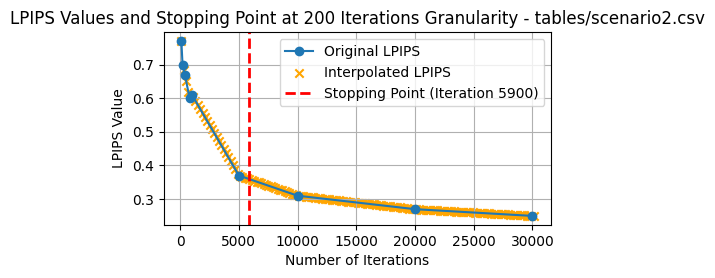

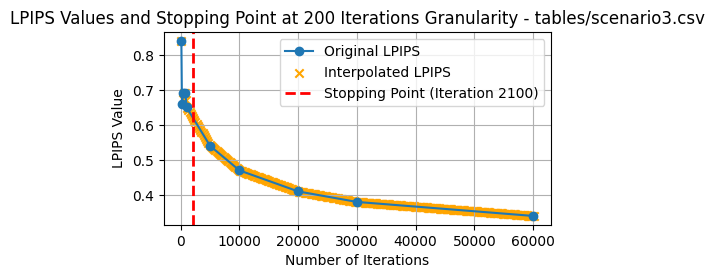

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hyperparameter_free_stopping_point(metric_values, window_size=5, consistency_length=3, std_dev_factor=2):
    if len(metric_values) < max(window_size + 1, consistency_length):
        return 0

    relative_changes = np.array([(metric_values[i] - metric_values[i - 1]) / metric_values[i - 1]
                                 for i in range(1, len(metric_values))])

    moving_avg = [np.mean(relative_changes[max(0, i - window_size):i]) for i in range(1, len(relative_changes) + 1)]
    moving_std_dev = [np.std(relative_changes[max(0, i - window_size):i]) for i in range(1, len(relative_changes) + 1)]

    # Check for plateau
    # Check for plateau
    for i in range(window_size, len(relative_changes)):
        if abs(relative_changes[i] - moving_avg[i]) < std_dev_factor * moving_std_dev[i]:
            # Check if the pattern continues for a set number of past iterations
            if all(abs(relative_changes[j] - moving_avg[j]) < std_dev_factor * moving_std_dev[j] 
                for j in range(max(i - consistency_length + 1, 0), i + 1)):
                return i
    return len(metric_values) - 1

def hyperparameter_free_stopping_point_simplified(metric_values, window_size=5, consistency_length=3, std_dev_factor=2.0):
    if len(metric_values) < max(window_size + 1, consistency_length):
        return 0

    relative_changes = np.array([(metric_values[i] - metric_values[i - 1]) / metric_values[i - 1]
                                 for i in range(1, len(metric_values))])

    moving_avg = [np.mean(relative_changes[max(0, i - window_size):i]) for i in range(1, len(relative_changes) + 1)]
    moving_std_dev = [np.std(relative_changes[max(0, i - window_size):i]) for i in range(1, len(relative_changes) + 1)]

    # Check for plateau
    # Check for plateau
    for i in range(window_size, len(relative_changes)):
        if abs(relative_changes[i]) < std_dev_factor* moving_std_dev[i]:
            # Check if the pattern continues for a set number of past iterations
            if all(abs(relative_changes[j]) < std_dev_factor * moving_std_dev[j] 
                for j in range(max(i - consistency_length + 1, 0), i + 1)):
                return i
    return len(metric_values) - 1

def process_and_plot(file_path, granularity=1000):
    # Read data
    data = pd.read_csv(file_path)
    model_data = data[data['Model Name'] == "NeRFacto"]
    sorted_model_data = model_data.sort_values('Number of Iterations').drop_duplicates('Number of Iterations')

    # Extract values
    iterations = sorted_model_data['Number of Iterations'].values
    lpips_values = sorted_model_data['LPIPS'].values

    # Interpolation
    interp_func = interp1d(iterations, lpips_values, kind='linear', fill_value="extrapolate")
    new_iterations = np.arange(min(iterations), max(iterations) + granularity, granularity)
    interpolated_values = interp_func(new_iterations)

    # Scaling factors
    # base_granularity = 500
    # base_window_size = 10
    # base_consistency_length = base_window_size / 2
    # scaling_factor = base_granularity / granularity
    # window_size = int(base_window_size * scaling_factor)
    # consistency_length = int(base_consistency_length * scaling_factor)

    window_size=10
    consistency_length=5
    # Find stopping point
    free_stopping_index = hyperparameter_free_stopping_point_simplified(
        interpolated_values,
        window_size=window_size,
        consistency_length=consistency_length,
        std_dev_factor=1
    )

    # Plotting
    plt.figure(figsize=(5, 2.5))
    plt.plot(iterations, lpips_values, label='Original LPIPS', marker='o', linestyle='-')
    plt.scatter(new_iterations, interpolated_values, label='Interpolated LPIPS', marker='x', color='orange')
    plt.axvline(x=new_iterations[free_stopping_index], color='red', linestyle='--', linewidth=2, label='Stopping Point (Iteration {})'.format(new_iterations[free_stopping_index]))
    plt.xlabel('Number of Iterations')
    plt.ylabel('LPIPS Value')
    plt.title(f'LPIPS Values and Stopping Point at {granularity} Iterations Granularity - {file_path}')
    plt.legend()
    plt.grid(True)
    plt.show()


scenario_files = ['tables/scenario1.csv', 'tables/scenario2.csv', 'tables/scenario3.csv']
for file in scenario_files:
    process_and_plot(file, granularity=200)


# Simple thresholding on Interpolated values

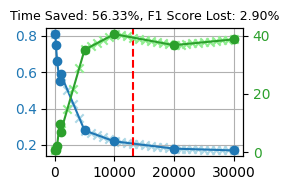

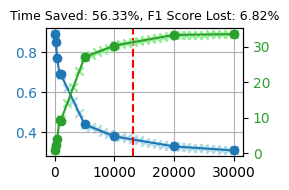

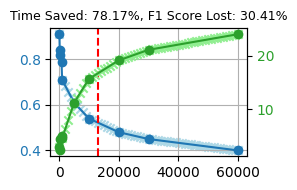

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os

def simple_plateau_detection(metric_values, threshold=0.01, consistency_length=5):
    if len(metric_values) < consistency_length:
        return 0

    for i in range(1, len(metric_values)):
        if all(abs(metric_values[j] - metric_values[j - 1]) < threshold 
               for j in range(max(0, i - consistency_length + 1), i)):
            return i
    return len(metric_values) - 1

def process_and_plot(inspect_model, file_path, granularity=1000, output_path="output"):
    # Read data
    data = pd.read_csv(file_path)
    model_data = data[data['Model Name'] == inspect_model]
    sorted_model_data = model_data.sort_values('Number of Iterations').drop_duplicates('Number of Iterations')

    # Extract values
    iterations = sorted_model_data['Number of Iterations'].values
    lpips_values = sorted_model_data['LPIPS'].values
    f1_scores = sorted_model_data['F1 Score'].values

    # Interpolation
    interp_lpips = interp1d(iterations, lpips_values, kind='linear', fill_value="extrapolate")
    interp_f1 = interp1d(iterations, f1_scores, kind='linear', fill_value="extrapolate")
    
    new_iterations = np.arange(min(iterations), max(iterations) + granularity, granularity)
    interpolated_lpips = interp_lpips(new_iterations)
    interpolated_f1 = interp_f1(new_iterations)

    # Find stopping point
    stopping_index = simple_plateau_detection(
        interpolated_lpips,
        threshold=0.01,
        consistency_length=3
    )

    # Calculate time saved and F1 score lost in percentage
    time_saved_percent = 100 * (1 - new_iterations[stopping_index] / max(iterations))
    f1_score_lost_percent = 100 * (1 - interpolated_f1[stopping_index] / max(f1_scores))

    # Plotting
    plt_size = (5 / 1.75, 3.5 / 1.75)
    f = plt.figure(figsize=plt_size)
    ax = plt.subplot(111)

    # Plot LPIPS values
    ax.plot(iterations, lpips_values, label='Original LPIPS', marker='o', linestyle='-', color='tab:blue', linewidth=1.5)
    ax.scatter(new_iterations, interpolated_lpips, label='Interpolated LPIPS', marker='x', color='lightblue')

    # Plot F1 Scores
    ax2 = ax.twinx()
    ax2.plot(iterations, f1_scores, label='Original F1 Score', marker='o', linestyle='-', color='tab:green', linewidth=1.5)
    ax2.scatter(new_iterations, interpolated_f1, label='Interpolated F1 Score', marker='x', color='lightgreen')
    
    ax.axvline(x=new_iterations[stopping_index], color='red', linestyle='--', linewidth=1.5, label='Stopping Point')
    # ax.set_xlabel('Number of Iterations')
    # ax.set_ylabel('LPIPS Value', color='tab:blue')
    # ax2.set_ylabel('F1 Score', color='tab:green')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(f'Time Saved: {time_saved_percent:.2f}%, F1 Score Lost: {f1_score_lost_percent:.2f}%', fontsize=9)
    # ax.legend(loc='upper left')
    ax.grid(True)
    f.tight_layout()

    # Saving the plot as a PDF
    output_file_name = os.path.join(output_path, inspect_model+"_"+ os.path.basename(file_path).replace('.csv', '.pdf'))
    f.savefig(output_file_name, format="pdf", bbox_inches="tight")
    plt.show()

# Example usage
scenario_files = ['tables/scenario1.csv', 'tables/scenario2.csv', 'tables/scenario3.csv']
inspect_model="Instant-NGP"
for file in scenario_files:
    process_and_plot(inspect_model, file, granularity=1000, output_path="analysis/lpips_vs_f1/")


In [57]:
plt.close()

In [7]:
import numpy as np

# Arrays for analysis
arrays = [
    np.array([0.75, 0.65, 0.55, 0.45, 0.44, 0.19, 0.15, 0.13, 0.12]),
    np.array([0.77, 0.7, 0.67, 0.6, 0.61, 0.37, 0.31, 0.27, 0.25]),
    np.array([0.84, 0.66, 0.69, 0.69, 0.65, 0.54, 0.47, 0.41, 0.38, 0.34])
]

# Calculate absolute differences
diffs = [np.abs(np.diff(arr)) for arr in arrays]

# Display the differences for analysis
diffs

[array([0.1 , 0.1 , 0.1 , 0.01, 0.25, 0.04, 0.02, 0.01]),
 array([0.07, 0.03, 0.07, 0.01, 0.24, 0.06, 0.04, 0.02]),
 array([0.18, 0.03, 0.  , 0.04, 0.11, 0.07, 0.06, 0.03, 0.04])]